In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
# 指定檔案位置，包含完整路徑以及檔案名稱
# os.curdir: 回傳目前目錄的路徑
# 若無法在個人電腦上以 Anaconda 開啟 Notebook，請用Google Colab開啟，並將下一行程式的註解消除，再將 turbofan.csv 資料上傳 
# Turbofan_FILEPATH = os.path.join(os.curdir, 'turbofan.csv')
Turbofan_FILEPATH = os.path.join(os.curdir, 'data', 'turbofan.csv')
# 檢視檔案位置
print(Turbofan_FILEPATH)
# 讀取 CSV 檔案，並將其指定為名稱是 df (DataFrame) 的物件
df = pd.read_csv(filepath_or_buffer=Turbofan_FILEPATH)
df_bak = df.copy()

./data/turbofan.csv


In [4]:
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN


# 第 3 章：製作圖表

## `plot()`：將資料轉成圖表

對 DataFrame 或是 Series 調用 `plot()` method 將可以把這些資料物件轉換為圖表。

預設支援相當多圖表的種類，這裡我們只挑選幾個常用的出來展示，如果需要查看所有圖表的類型以及用法，請參閱[官方文件](https://pandas.pydata.org/pandas-docs/stable/visualization.html#other-plots)。

調用的方法相當多元，以箱形圖 (Box plot) 為例子

* 使用 `.plot()` function 並指定 `kind` parameter：`pandas.DataFrame.plot(kind='box')`
* 使用 `.plot` attribute，再呼叫 `.box()` function：`pandas.DataFrame.plot.box()`
* 箱形圖較特殊，可以直接調用 DataFrame 的 `.boxplot()` method：`pandas.DataFrame.boxplot()`

這裡我們以調用 `.plot()` function 的方法為主。

* 參考文件：
    * [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
    * [pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)
    * [10 Minutes to pandas | Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)
    * [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

> 備註：
>
> 此次的教學環境是以 Jupyter Notebook 為主，預設可以直接顯示 Pandas 產生的圖表，若往後有要調用 `matplotlib` 或其他套件產生圖表、並在 Jupyter Notebook 裡顯示的需求，請自行參閱該套件本身的文件說明。

### `.plot(kind='bar')`：長條圖

以下說明節錄自維基百科「[條形統計圖](https://zh.wikipedia.org/zh-tw/條形統計圖)」條目：

> 長條圖（英文：bar chart）亦稱條圖（英文：bar graph）、條狀圖、棒形圖、柱狀圖，是一種以長方形的長度為變量的統計圖表。長條圖用來比較兩個或以上的數值（不同時間或者不同條件），只有一個變量，通常利用於較小的數據集分析。長條圖亦可橫向排列，或用多維方式表達。

參考文件：

* [Wikipedia | 條形統計圖](https://zh.wikipedia.org/zh-tw/條形統計圖)

In [5]:
df.loc[:, 'unit_number'].value_counts()

69    362
92    341
96    336
67    313
83    293
     ... 
24    147
57    137
70    137
91    135
39    128
Name: unit_number, Length: 100, dtype: int64

<AxesSubplot:title={'center':'unit_number value counts Top 10'}>

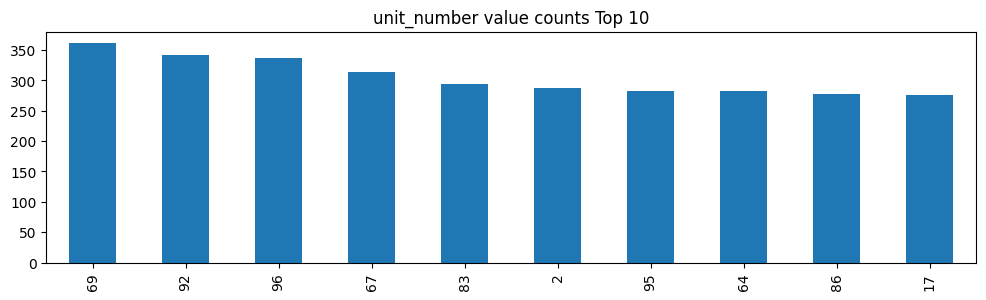

In [6]:
# 計算出 工作週期 最長的前十名
top10 = df.loc[:, 'unit_number'].value_counts().head(10)

# 工作週期 最長的前十名，畫成直方圖
top10.plot(kind='bar', title='unit_number value counts Top 10')

<AxesSubplot:>

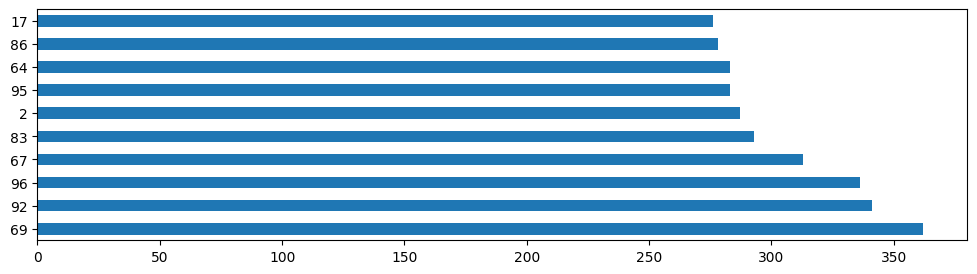

In [7]:
top10.plot.barh()

### `.plot(kind='line')`：折線圖

以下說明節錄自維基百科之「[趨勢圖](https://zh.wikipedia.org/zh-tw/趋势图)」條目：

> 趨勢圖（英文：run chart），也稱運行圖、鏈圖、走勢圖，是一類在時間序列中表達數據變量的統計圖表，通常該數據在一些工業或商業過程中可用來表達特定程序的表現。

參考文件：

* [Wikipedia | 趨勢圖](https://zh.wikipedia.org/zh-tw/趨勢圖)

<AxesSubplot:title={'center':'sensor_1'}>

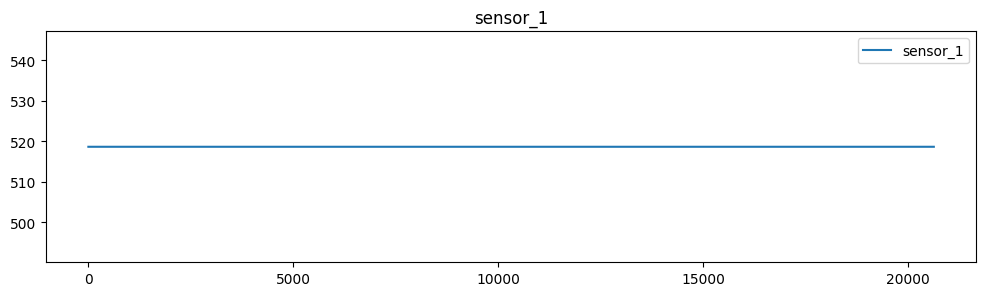

In [8]:
# 例：將感測器1 (Column label: 'sensor_1') 畫成折線圖
# 並在標題顯示 'sensor_1
df[['sensor_1']].plot(kind='line', title='sensor_1')

<AxesSubplot:title={'center':'sensor_2'}>

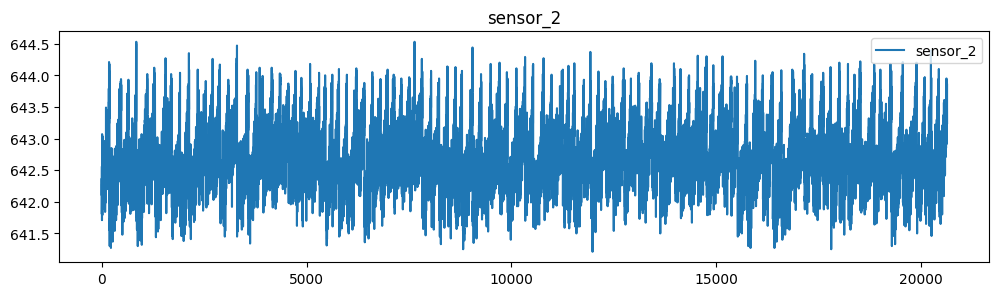

In [9]:
# 例：將感測器2 (Column label: 'sensor_2') 畫成折線圖
# 並在標題顯示 'sensor_2
df[['sensor_2']].plot(kind='line', title='sensor_2')

<AxesSubplot:title={'center':'sensor_2 and sensor_7'}>

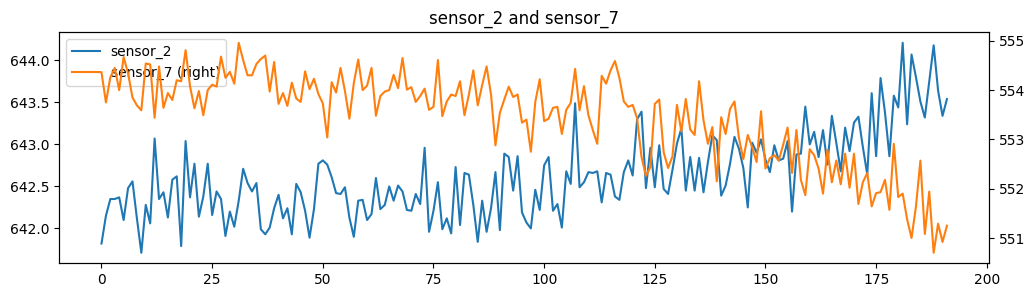

In [10]:
# 例：將設備編號為1的感測器2和感測器7 (Column label: 'unit_number', 'sensor_2', 'sensor_7') 畫成折線圖
# 並在標題顯示 'sensor_2 and sensor_7
df[df["unit_number"]==1][['sensor_2', 'sensor_7']].plot(kind='line', secondary_y="sensor_7", title='sensor_2 and sensor_7')

### `.plot(kind='box')`：箱形圖 (Box Plot)

以下說明節錄自維基百科「[箱形圖](https://zh.wikipedia.org/zh-tw/箱形圖)」條目：

> 又稱為盒鬚圖、盒式圖、盒狀圖或箱線圖，是一種用作顯示一組數據分散情況資料的統計圖。因型狀如箱子而得名。

參考文件：
* [Wikipedia | 箱形圖](https://zh.wikipedia.org/zh-tw/箱形圖)
* [箱型圖圖例說明](https://cht.qap.tw/example.htm)

<AxesSubplot:>

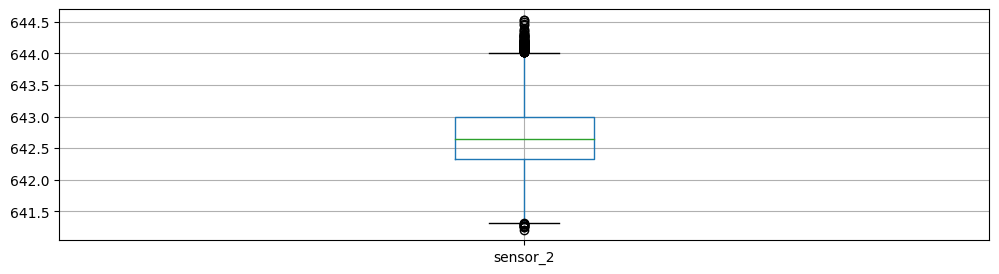

In [11]:
df[['sensor_2']].plot(kind='box', grid=True)

<AxesSubplot:>

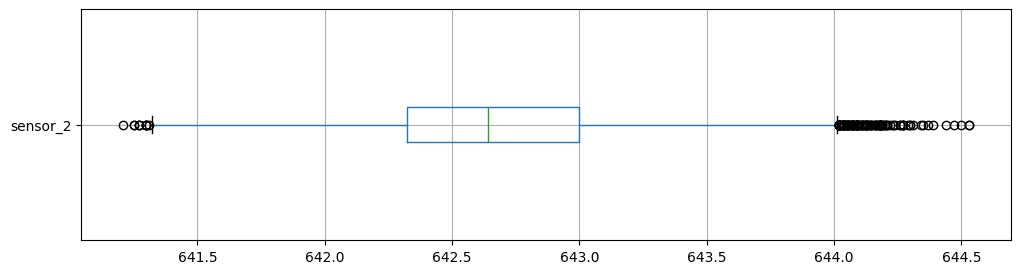

In [12]:
# 舉例說明：將 sensor_2 畫成箱形圖，將圖形設為水平 (vert (= vertical) 為 False)
df[['sensor_2']].plot(kind='box', grid=True, vert=False)
# 與以下寫法等價
# df[['sensor_2']].boxplot(vert=False)